In [71]:
import numpy as np
import pandas as pd
import shapefile as shp
import matplotlib.pyplot as plt
import seaborn as sns
import random

%matplotlib inline

In [72]:
sns.set(style="whitegrid", palette="pastel", color_codes=True)
sns.mpl.rc("figure", figsize=(10,6))

In [73]:
shp_path = "Tracts_WUI_ByYear/trends.shp"
sf = shp.Reader(shp_path)

ShapefileException: Unable to open Tracts_WUI_ByYear/trends.dbf or Tracts_WUI_ByYear/trends.shp.

In [5]:
def read_shapefile(sf):
    """
    Read a shapefile into a Pandas dataframe with a 'coords' 
    column holding the geometry information. This uses the pyshp
    package
    """
    fields = [x[0] for x in sf.fields][1:]
    records = sf.records()
    shps = [s.points for s in sf.shapes()]
    df = pd.DataFrame(columns=fields, data=records)
    df = df.assign(coords=shps)
    return df

In [6]:
df = read_shapefile(sf)
print(df.shape)
df.head()

(3523, 19)


,STATEFP10,COUNTYFP10,TRACTCE10,id,NAME10,NAMELSAD10,MTFCC10,FUNCSTAT10,ALAND10,AWATER10,INTPTLAT10,INTPTLON10,geo_id,census_tra,county,estimate,error,year,coords
0,06,037,500403,6037500403,5004.03,Census Tract,G5020,S,2057389,189585,+34.0073290,-118.0660305,1400000US06037500403,5004.03,Los Angeles County,4067,544,2010,"[(-118.072722, 33.995982999999995), (-118.0721..."
1,06,065,045103,6065045103,451.03,Census Tract,G5020,S,23058405,383371,+33.7382362,-116.4469086,1400000US06065045103,451.03,Riverside County,4107,510,2010,"[(-116.477924, 33.757493), (-116.477901, 33.75..."
2,06,065,046404,6065046404,464.04,Census Tract,G5020,S,10645119,0,+33.6510929,-117.2771726,1400000US06065046404,464.04,Riverside County,4723,441,2010,"[(-117.3002, 33.660089), (-117.29991799999999,..."
3,06,065,045108,6065045108,451.08,Census Tract,G5020,S,2683462,0,+33.7251292,-116.3737209,1400000US06065045108,451.08,Riverside County,5082,686,2010,"[(-116.391385, 33.724388999999995), (-116.3913..."
4,06,037,122122,6037122122,1221.22,Census Tract,G5020,S,1017265,15394,+34.2197648,-118.3736105,1400000US06037122122,1221.22,Los Angeles County,1964,287,2010,"[(-118.379477, 34.223303), (-118.377439, 34.22..."


In [74]:
# Fill map with specific color
def plot_all(sf, title, color):
    df = read_shapefile(sf)
    indices = []
    for x in df.id:
        indices.append(df[df.id == x].index.values[0])
    plot_map_fill_multiples_ids(title, indices, sf, 
                                       x_lim = None, 
                                       y_lim = None, 
                                       figsize = (11,9), 
                                       color = color)

<Figure size 792x648 with 0 Axes>

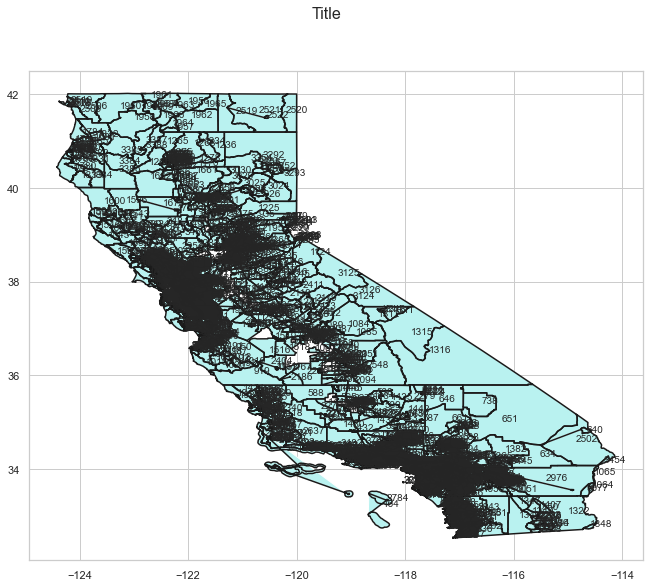

In [75]:
plot_all(sf, "Title", 'c')

In [68]:
def plot_map(title, sf, value_arr, value_to_color_lambda, x_lim = None, y_lim = None, figsize = (11,9), color = 'r'):
    '''
    Plot map with lim coordinates
    '''
    
    df = read_shapefile(sf)
    plt.figure(figsize = figsize)
    fig, ax = plt.subplots(figsize = figsize)
    fig.suptitle(title, fontsize=16)
    for shape in sf.shapeRecords():
        x = [i[0] for i in shape.shape.points[:]]
        y = [i[1] for i in shape.shape.points[:]]
        ax.plot(x, y, 'k')
            
    print()
    print("# Rows:", df.shape[0])
    id_list = list(range(df.shape[0]))
    half_size = len(id_list) // 2
    quarter_size = half_size // 2
    for id in id_list:
        shape_ex = sf.shape(id)
        x_lon = np.zeros((len(shape_ex.points),1))
        y_lat = np.zeros((len(shape_ex.points),1))
        for ip in range(len(shape_ex.points)):
            x_lon[ip] = shape_ex.points[ip][0]
            y_lat[ip] = shape_ex.points[ip][1]
            
        color = value_to_color_lambda(df)
        ax.fill(x_lon,y_lat, color)
        
        if id == quarter_size:
            print("Processing: 25%")
            
        if id == half_size:
            print("Processing: 50%")
            
        if id == half_size + quarter_size:
            print("Processing: 75%")
    
    if (x_lim != None) & (y_lim != None):     
        plt.xlim(x_lim)
        plt.ylim(y_lim)


# Rows: 3523
Processing: 25%
Processing: 50%
Processing: 75%


<Figure size 792x648 with 0 Axes>

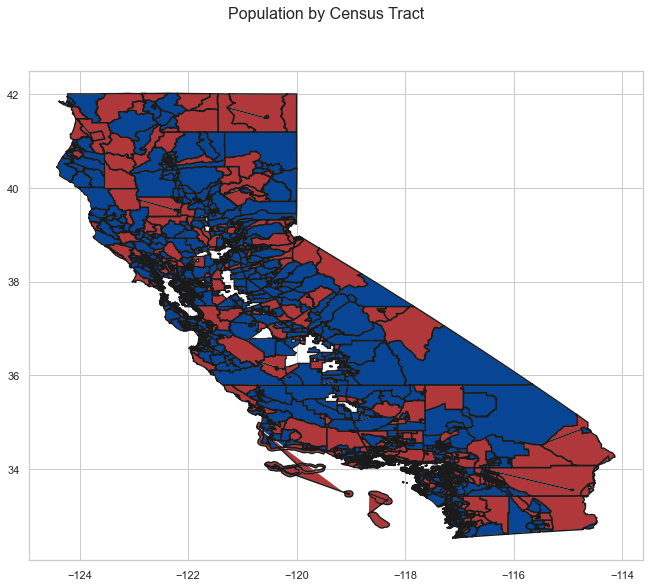

In [69]:
df = read_shapefile(sf)
blue = "#084594"
red = "#b0383a"

pop_lambda = lambda row : "#084594" if row.estimate > 3000 else "#b0383a"
plot_map("Population by Census Tract", sf, df.estimate, pop_lambda)

In [70]:
trend_colors = {
    "increasing": "#084594",
    "decreasing": "#b0383a",
    "no_trend": "#eeeeee"
}
trend_lambda = lambda row : trend_colors[row.trend]
plot_map("Trend by Census Tract", sf, df.trend, trend_lambda)

AttributeError: 'DataFrame' object has no attribute 'trend'